# Feature Extraction w TF-IDF

The purpose of this notebook is extract text features of movie reviews using **TF-IDF**. The idea being that this feature extraction method will be compared to **Doc2Vec** in the sentiment classification task. 

**Questions**

What does the `TF-IDF` vectorizer do when the validation set has a word in it that does not appear in the train set? How does it scale this feature in the validation set? 

## import packages


In [36]:
import pandas as pd
from time import time
import sys
sys.path.append("/Users/lesleymi/data_science_tutorials/IMDB_Sentiment_Analysis/src")
import imdb_functions as imdb

# feature extractor
from sklearn.feature_extraction.text import TfidfVectorizer

# models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# evaluation 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## load data

In [37]:
# load clean train data 
X_train = pd.read_csv("data/train_clean.csv").drop(labels='Unnamed: 0', axis=1).text
y_train = pd.read_csv("data/Train.csv").label
X_valid = pd.read_csv("data/valid_clean.csv").drop(labels='Unnamed: 0', axis=1)
y_valid = X_valid.label

In [38]:
print("Train set has {} documents.".format(X_train.shape[0]))
print("Validation set has {} documents.".format(X_valid.shape[0]))

Train set has 40000 documents.
Validation set has 5000 documents.


In [39]:
X_train

0        grow watch love thunderbirds mate school watch...
1        movie dvd player sit coke chip expectation hop...
2        people know particular time past like feel nee...
3        great interest biblical movie bore death minut...
4        be die hard dad army fan change get tape dvd a...
                               ...                        
39995    western union forget classic western reason li...
39996    movie incredible piece work explore nook crann...
39997    wife watch movie plan visit sicily stromboli s...
39998    watch flatliners amaze necessary feature good ...
39999    film good gross estimate award nomination john...
Name: text, Length: 40000, dtype: object

## TF-IDF

**Note**

I didn't set a max features parameter thus, the vectorizer uses all the unique words in the training corpus as features. This results in many more features/unique words than training documents!!! This will likely pose a problem later. But most of the classifiers apply regularization by default anyway. 

In [40]:
# initialize the vectorizer 
vectorizer = TfidfVectorizer()

# fit and transform train set 
X_train_tfidf = vectorizer.fit_transform(X_train)

In [41]:
print("The TF-IDF transformed data structure is a {}".format(type(X_train_tfidf)))
print("There are {} unique words in the vocabulary.".format(X_train_tfidf.shape[1]))

The TF-IDF transformed data structure is a <class 'scipy.sparse.csr.csr_matrix'>
There are 73448 unique words in the vocabulary.


In [42]:
# transform the validation set 
X_valid_tfidf = vectorizer.transform(X_valid.text)

## Sentiment Classification 

## Logistic Regression 

#### train set 

In [50]:
start = time()
lr = LogisticRegression(random_state=0, max_iter=1000).fit(X_train_tfidf, y_train)
stop = time()
print("training time for logistic regression... {} seconds".format(round(stop - start, 2)))

training time for logistic regression... 3.03 seconds


In [51]:
acc = round(lr.score(X_train_tfidf, y_train), 2)*100
print('Train accuracy: {} %'.format(acc))

Train accuracy: 92.0 %


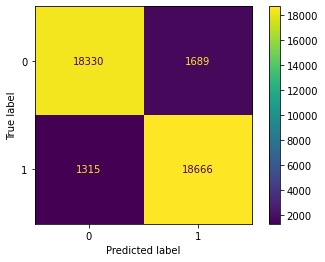

In [52]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_train_tfidf, y_true=y_train)

In [53]:
# get model predictions 
y_pred = lr.predict(X_train_tfidf)
metrics = precision_recall_fscore_support(y_true=y_train, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.933062,0.917023
recall,0.915630,0.934187
f1_score,0.924264,0.925526
count_of_reviews,20019.000000,19981.000000


#### validation set 

In [54]:
acc = round(lr.score(X_valid_tfidf, y_valid), 2)*100
print('Validation accuracy: {} %'.format(acc))

Validation accuracy: 88.0 %


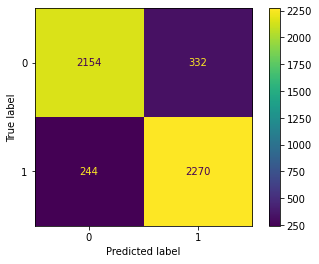

In [55]:
### confusion matrix
plot_confusion_matrix(estimator=lr, X=X_valid_tfidf, y_true=y_valid)

In [56]:
# get model predictions 
y_pred = lr.predict(X_valid_tfidf)
metrics = precision_recall_fscore_support(y_true=y_valid, y_pred=y_pred)
imdb.display_metrics(metrics)

,neg_reviews,pos_reivews
precision,0.898249,0.872406
recall,0.866452,0.902944
f1_score,0.882064,0.887412
count_of_reviews,2486.000000,2514.000000
